In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

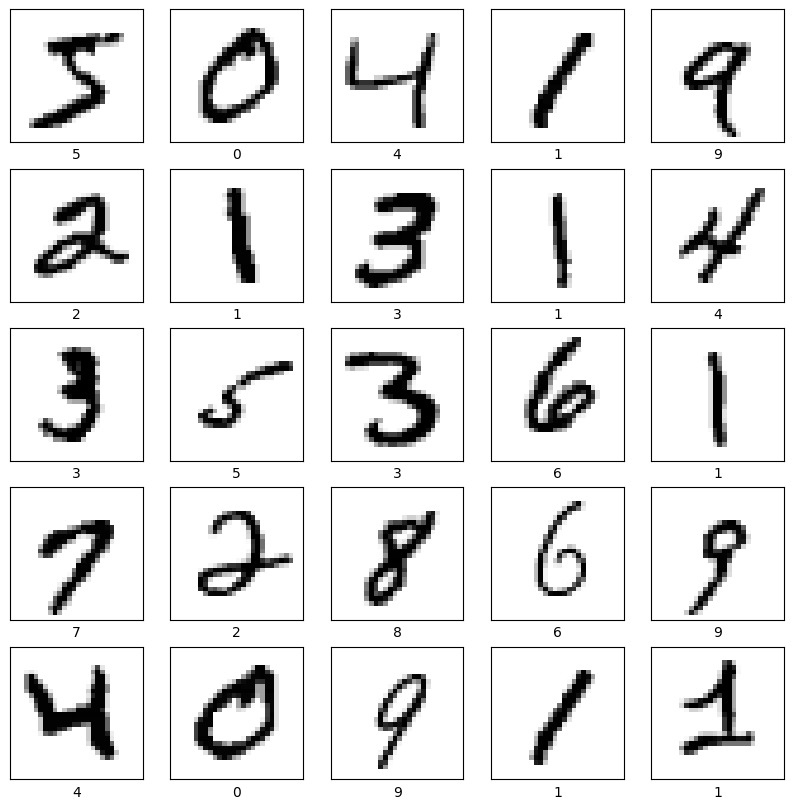

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8426 - loss: 0.5353 - val_accuracy: 0.9535 - val_loss: 0.1577
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9527 - loss: 0.1615 - val_accuracy: 0.9684 - val_loss: 0.1120
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0.1167 - val_accuracy: 0.9700 - val_loss: 0.1019
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9718 - loss: 0.0912 - val_accuracy: 0.9726 - val_loss: 0.0901
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0755 - val_accuracy: 0.9768 - val_loss: 0.0836
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9800 - loss: 0.0637 - val_accuracy: 0.9755 - val_loss: 0.0830
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9801 - loss: 0.0617 - val_accuracy: 0.9785 - val_loss: 0.0774
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.052

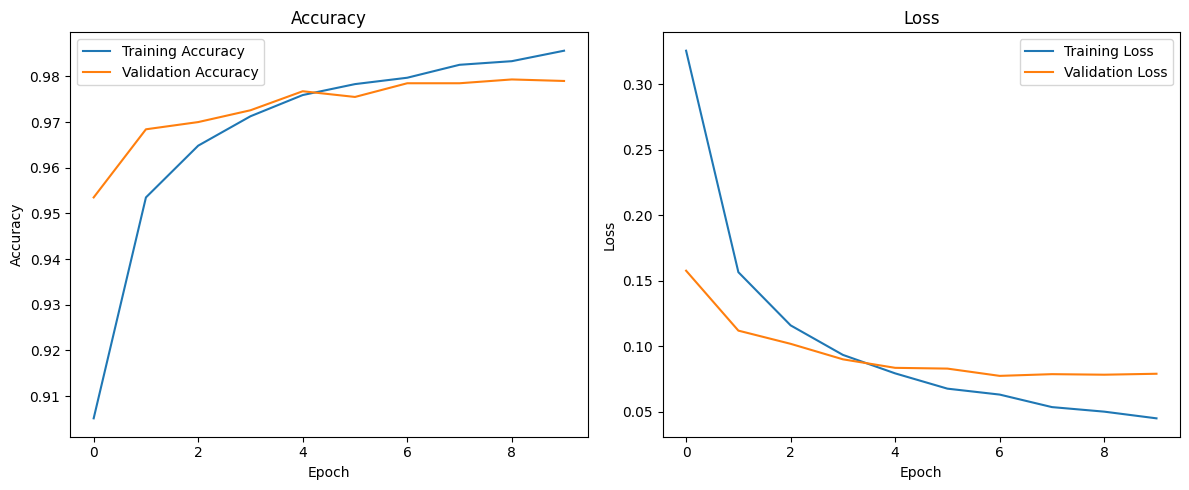

Test Accuracy: 0.9810000061988831


In [3]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Visualize a few examples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Reshape the dataset
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Visualize performance
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Normalize the data
X = X / 255.0

# Convert labels to integers
y = y.astype(int)

# One-hot encode labels
n_labels = len(np.unique(y))
y_one_hot = np.zeros((y.shape[0], n_labels))
for i in range(y.shape[0]):
    y_one_hot[i, y[i]] = 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.2, random_state=42)

# Define activation function (sigmoid)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function


def sigmoid_derivative(x):
    return x * (1 - x)

# Define ReLU activation function and its derivative


def relu(x):
    return np.maximum(0, x)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Update NeuralNetwork class to use ReLU activation function and add L2 regularization


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=50, reg_lambda=0):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.reg_lambda = reg_lambda

        # Initialize weights with smaller values
        self.weights_input_hidden = np.random.randn(
            self.input_size, self.hidden_size) / np.sqrt(self.input_size)
        self.weights_hidden_output = np.random.randn(
            self.hidden_size, self.output_size) / np.sqrt(self.hidden_size)

    def forward(self, X):
        # Forward propagation through the network
        self.hidden_input = np.dot(X, self.weights_input_hidden)
        self.hidden_output = relu(self.hidden_input)
        self.output = sigmoid(
            np.dot(self.hidden_output, self.weights_hidden_output))
        return self.output

    def backward(self, X, y, output):
        # Backward propagate through the network
        self.output_error = y - output
        self.output_delta = self.output_error * sigmoid_derivative(output)

        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * \
            relu_derivative(self.hidden_output)

        # Update weights with L2 regularization
        self.weights_hidden_output += self.hidden_output.T.dot(
            self.output_delta) * self.learning_rate - self.reg_lambda * self.weights_hidden_output
        self.weights_input_hidden += X.T.dot(self.hidden_delta) * \
            self.learning_rate - self.reg_lambda * self.weights_input_hidden

    def train(self, X, y):
        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return np.round(self.forward(X))


# Initialize neural network
input_size = X_train.shape[1]
hidden_size = 128
output_size = n_labels
learning_rate = 0.01
epochs = 50
reg_lambda = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size,
                   learning_rate, epochs, reg_lambda)

# Train the neural network
nn.train(X_train, y_train)

# Test the neural network
predictions = nn.predict(X_test)
accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
conf_matrix = confusion_matrix(
    y_test.argmax(axis=1), predictions.argmax(axis=1))

print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppDa

Test Accuracy: 0.09592857142857143
Confusion Matrix:
 [[1343    0    0    0    0    0    0    0    0    0]
 [1600    0    0    0    0    0    0    0    0    0]
 [1380    0    0    0    0    0    0    0    0    0]
 [1433    0    0    0    0    0    0    0    0    0]
 [1295    0    0    0    0    0    0    0    0    0]
 [1273    0    0    0    0    0    0    0    0    0]
 [1396    0    0    0    0    0    0    0    0    0]
 [1503    0    0    0    0    0    0    0    0    0]
 [1357    0    0    0    0    0    0    0    0    0]
 [1420    0    0    0    0    0    0    0    0    0]]


C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\midoh\AppData\Local\Temp\ipykernel_4320\945505475.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


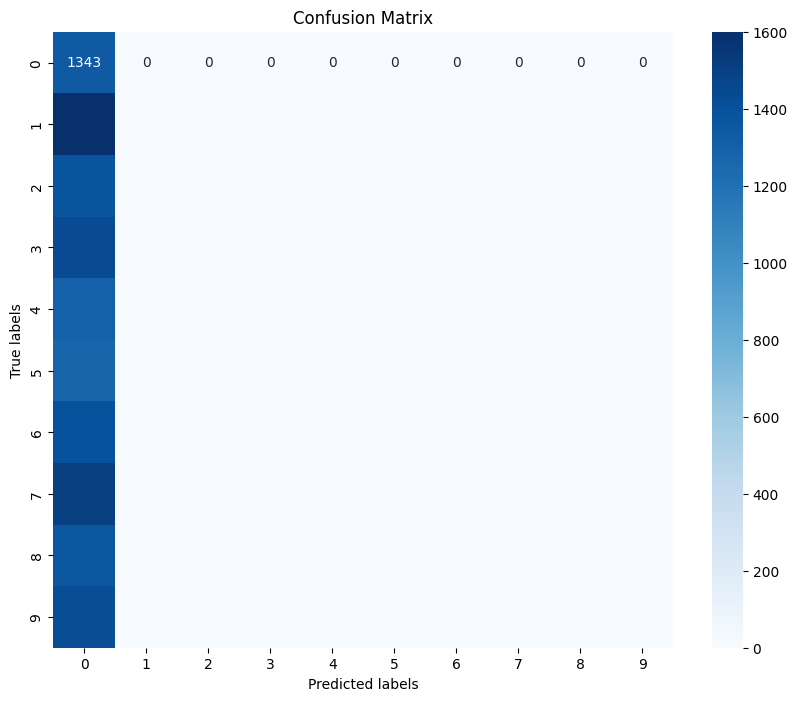

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Get label names
label_names = [str(i) for i in range(10)]

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, label_names)
